In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2


In [2]:
raw_csv_data = pd.read_csv('Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp['date'] = pd.to_datetime(df_comp['date'], dayfirst = True)
df_comp.set_index('date',inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value'] = df_comp.ftse

In [4]:
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
del df_comp['spx']

size = int(len(df_comp)*0.8)
df,df_test = df_comp.iloc[:size],df_comp.iloc[size:]

In [5]:
def LLR_test(mod1,mod2,DF=1):
   L1 = mod1.fit().llf
   L2 = mod2.fit().llf
   LR = (2*(L2-L1))
   p = chi2.sf(LR,DF).round(3)
   return p

In [6]:
df['returns'] = df['market_value'].pct_change(1).mul(100)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,market_value,returns
date,,
1994-01-07,3445.98,NaN
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166


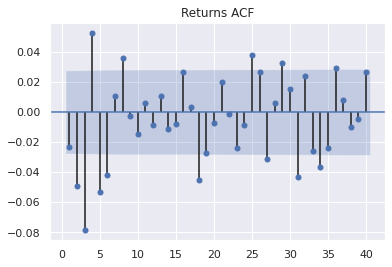

In [29]:
sgt.plot_acf(df.returns[1:],lags=40,zero = False)
plt.title('Returns ACF')
plt.show()

#Moving Average Modeling

## MA(1)

In [8]:
ret_model_ma_1 = ARMA(df.returns[1:], order =(0,1))
results_ret_ma_1 = ret_model_ma_1.fit()
results_ret_ma_1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Tue, 15 Nov 2022   AIC                          15865.190
Time:                        04:30:45   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8550           +0.0000j           38.8550            0.0000
-----------------------------------------------------------------------------
"""

##Using Higher Lag Models For Returns 

In [9]:
ret_model_ma_2 = ARMA(df.returns[1:], order =(0,2))
results_ret_ma_2 = ret_model_ma_2.fit()
print(results_ret_ma_2.summary())
print('\nLLR-test p-value is '+str(LLR_test(ret_model_ma_1,ret_model_ma_2)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.864
Method:                       css-mle   S.D. of innovations              1.173
Date:                Tue, 15 Nov 2022   AIC                          15853.728
Time:                        04:30:46   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.239      0.215      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.297      0.022      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [10]:
ret_model_ma_3 = ARMA(df.returns[1:], order =(0,3))
results_ret_ma_3 = ret_model_ma_3.fit()
print(results_ret_ma_3.summary())
print('\nLLR-test p-value is '+str(LLR_test(ret_model_ma_2,ret_model_ma_3)))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -7904.317
Method:                       css-mle   S.D. of innovations              1.168
Date:                Tue, 15 Nov 2022   AIC                          15818.634
Time:                        04:30:47   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0203      0.014     -1.423      0.155      -0.048       0.008
ma.L2.returns    -0.0556      0.013     

In [11]:
ret_model_ma_6 = ARMA(df.returns[1:], order =(0,6))
results_ret_ma_6 = ret_model_ma_6.fit()
print(results_ret_ma_6.summary())
#print('\nLLR-test p-value is '+str(LLR_test(ret_model_ma_1,ret_model_ma_2)))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -7889.221
Method:                       css-mle   S.D. of innovations              1.165
Date:                Tue, 15 Nov 2022   AIC                          15794.442
Time:                        04:30:47   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.430      0.153      -0.007       0.045
ma.L1.returns    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.returns    -0.0486      0.014     

In [12]:
ret_model_ma_7 = ARMA(df.returns[1:], order =(0,7))
results_ret_ma_7 = ret_model_ma_7.fit()
print(results_ret_ma_7.summary())
print('\nLLR-test p-value is '+str(LLR_test(ret_model_ma_6,ret_model_ma_7)))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 7)   Log Likelihood               -7889.046
Method:                       css-mle   S.D. of innovations              1.165
Date:                Tue, 15 Nov 2022   AIC                          15796.091
Time:                        04:30:48   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.418      0.156      -0.007       0.045
ma.L1.returns    -0.0247      0.014     -1.739      0.082      -0.052       0.003
ma.L2.returns    -0.0488      0.014     

In [13]:
ret_model_ma_8 = ARMA(df.returns[1:], order =(0,8))
results_ret_ma_8 = ret_model_ma_8.fit()
print(results_ret_ma_8.summary())
print('\nLLR-test p-value is '+str(LLR_test(ret_model_ma_7,ret_model_ma_8)))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -7885.603
Method:                       css-mle   S.D. of innovations              1.164
Date:                Tue, 15 Nov 2022   AIC                          15791.205
Time:                        04:30:50   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.364      0.173      -0.008       0.046
ma.L1.returns    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.returns    -0.0495      0.014     

In [14]:
LLR_test(ret_model_ma_6,ret_model_ma_8,DF=2)

0.027

#Residual for Returns

##For The 8 Lags Model

In [15]:
df['res_model_ret_ma_8'] = results_ret_ma_8.resid[1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df.head(4)

,market_value,returns,res_model_ret_ma_8
date,,,
1994-01-07,3445.98,NaN,NaN
1994-01-10,3440.58,-0.156704,NaN
1994-01-11,3413.77,-0.779229,-0.802111
1994-01-12,3372.02,-1.222988,-1.269464


In [17]:
print('The mean of the residuals is ' + str(df.res_model_ret_ma_8.mean().round(3)))
print('The variance of the residuals is ' + str(df.res_model_ret_ma_8.var().round(3)))
print('The standard deviation of the residuals is ' + str(df.res_model_ret_ma_8.std().round(3)))

The mean of the residuals is -0.0
The variance of the residuals is 1.356
The standard deviation of the residuals is 1.164


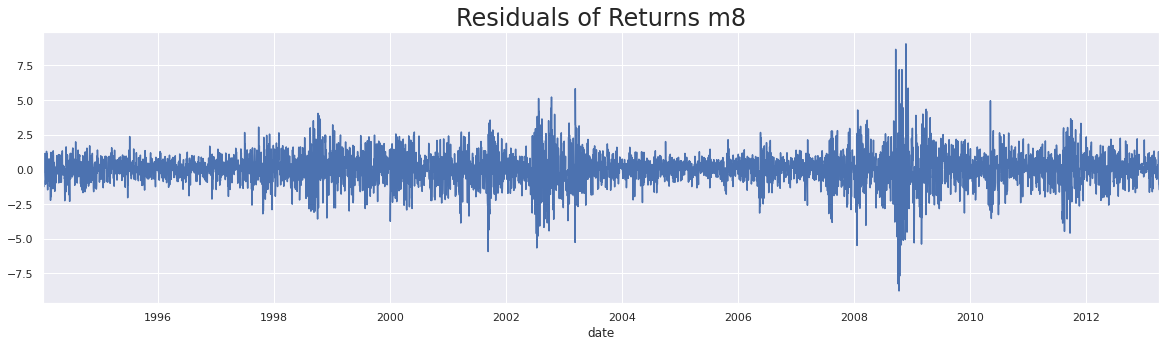

In [18]:
df.res_model_ret_ma_8[1:].plot(figsize=(20,5))
plt.title('Residuals of Returns m8',size=24)
plt.show()

In [19]:
sts.adfuller(df.res_model_ret_ma_8[2:])

(-70.83581919699557,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15684.052185267185)

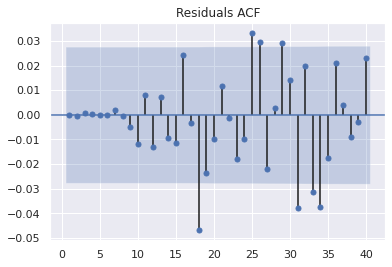

In [20]:
sgt.plot_acf(df.res_model_ret_ma_8[2:],lags = 40,zero= False)
plt.title('Residuals ACF')
plt.show()

##For The 6 Lags Model

In [21]:
df['res_model_ret_ma_6'] = results_ret_ma_6.resid[1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df.head(4)

,market_value,returns,res_model_ret_ma_8,res_model_ret_ma_6
date,,,,
1994-01-07,3445.98,NaN,NaN,NaN
1994-01-10,3440.58,-0.156704,NaN,NaN
1994-01-11,3413.77,-0.779229,-0.802111,-0.802083
1994-01-12,3372.02,-1.222988,-1.269464,-1.268789


In [23]:
print('The mean of the residuals is ' + str(df.res_model_ret_ma_6.mean().round(3)))
print('The variance of the residuals is ' + str(df.res_model_ret_ma_6.var().round(3)))
print('The standard deviation of the residuals is ' + str(df.res_model_ret_ma_6.std().round(3)))

The mean of the residuals is -0.0
The variance of the residuals is 1.357
The standard deviation of the residuals is 1.165


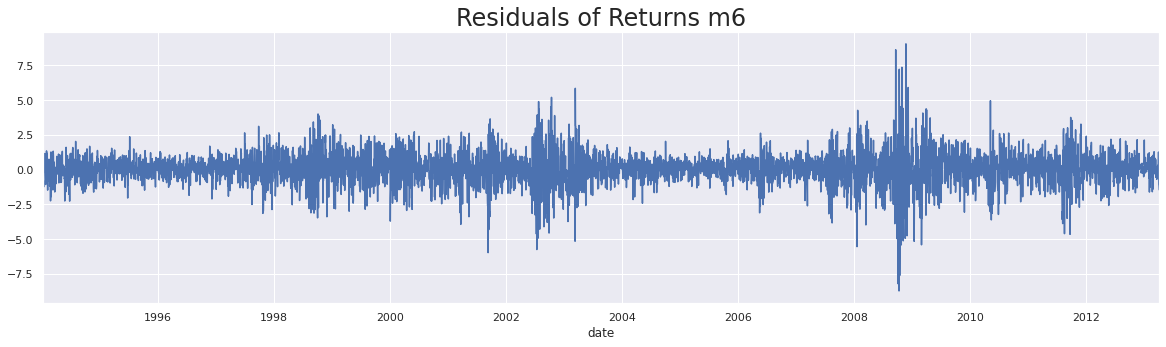

In [24]:
df.res_model_ret_ma_6[1:].plot(figsize=(20,5))
plt.title('Residuals of Returns m6',size=24)
plt.show()

In [25]:
sts.adfuller(df.res_model_ret_ma_6[2:])

(-70.83995823065305,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15691.135289602924)

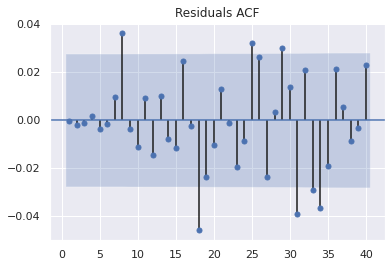

In [26]:
sgt.plot_acf(df.res_model_ret_ma_6[2:],lags = 40,zero= False)
plt.title('Residuals ACF')
plt.show()

#Normalized Returns

In [27]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


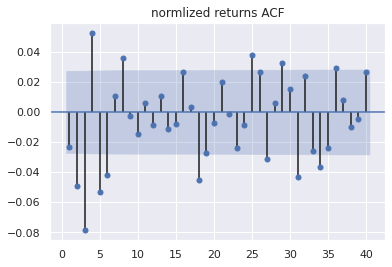

In [35]:
sgt.plot_acf(df.norm_ret[1:],lags = 40,zero= False)
plt.title('normlized returns ACF')
plt.show()

In [36]:
ret_norm_model_ma_6 = ARMA(df.returns[1:], order =(0,6))
results_norm_ret_ma_6 = ret_norm_model_ma_6.fit()
print(results_norm_ret_ma_6.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -7889.221
Method:                       css-mle   S.D. of innovations              1.165
Date:                Tue, 15 Nov 2022   AIC                          15794.442
Time:                        04:39:56   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.430      0.153      -0.007       0.045
ma.L1.returns    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.returns    -0.0486      0.014     

In [37]:
df['res_norm_ret_ma_6'] = results_norm_ret_ma_6.resid[1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
df.head(3)

,market_value,returns,res_model_ret_ma_8,res_model_ret_ma_6,norm_ret,res_norm_ret_ma_6
date,,,,,,
1994-01-07,3445.98,NaN,NaN,NaN,NaN,NaN
1994-01-10,3440.58,-0.156704,NaN,NaN,100.000000,NaN
1994-01-11,3413.77,-0.779229,-0.802111,-0.802083,497.260711,-0.802083


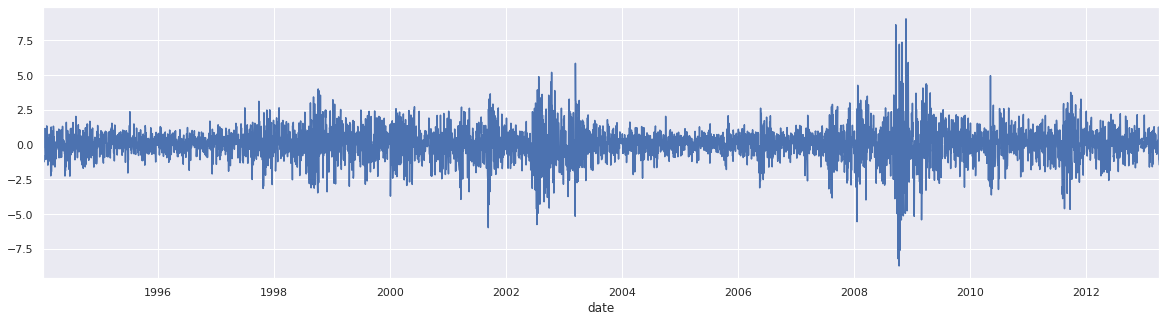

In [38]:
df.res_norm_ret_ma_6.plot(figsize=(20,5))
plt.show()

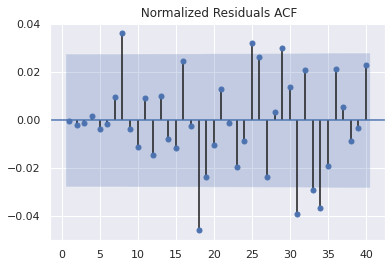

In [40]:
sgt.plot_acf(df.res_norm_ret_ma_6[2:],lags = 40,zero= False)
plt.title(' Normalized Residuals ACF')
plt.show()

**Normlization doesn't effect the MA model**